In [2]:
from sklearn.datasets import fetch_openml
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from z3 import *
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from PIL import Image

In [3]:
mnist = fetch_openml('mnist_784', version=1, cache=True, parser='auto')
X_iris, y_iris = load_iris(return_X_y=True, as_frame=True)

In [4]:
scaler = MinMaxScaler()
scaler.fit(mnist.data)
scaler.set_output(transform='pandas')
data_scaled = scaler.transform(mnist.data)

scaler.fit(X_iris)
scaler.set_output(transform='pandas')
X_iris = scaler.transform(X_iris)

In [5]:
X, y = mnist.data, mnist.target
y = y.astype(np.uint8)

In [6]:
classes_to_keep = [1, 5, 8]
mask = np.isin(y, classes_to_keep)
X_filtered = X[mask]
y_filtered = y[mask]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.3, stratify=y_filtered)

In [8]:
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.3, stratify=y_iris)

In [9]:
logistic_regression_classifier = LogisticRegression(multi_class='multinomial', max_iter=200)
iris_class = LogisticRegression(multi_class='multinomial', max_iter=200)

In [10]:
logistic_regression_classifier.fit(X_train, y_train)
iris_class.fit(X_train_iris, y_train_iris)

c:\Users\gleilsonpedro\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200, multi_class='multinomial')

In [11]:
predictions = logistic_regression_classifier.predict(X_test)
predictions_iris = iris_class.predict(X_test_iris)

In [12]:
predictions_iris

array([2, 1, 1, 2, 2, 1, 0, 0, 1, 1, 1, 1, 1, 2, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 2, 1, 1, 1, 0, 0, 1, 2, 0, 1, 0, 0, 2, 2, 0, 2, 0, 1, 2, 2, 1,
       2])

In [13]:
accuracy = accuracy_score(y_test, predictions)
accuracy_iris = accuracy_score(y_test_iris, predictions_iris)
print("Mnist accuracy:", accuracy)
print("Iris accuracy:", accuracy_iris)

Mnist accuracy: 0.9505154639175257
Iris accuracy: 0.9333333333333333


In [14]:
def plot_mnist_image(image):
    plt.imshow(image.reshape(28, 28), cmap='binary')
    plt.axis('off')
    plt.show()

In [15]:
#global real_vars
real_vars = [Real('x_' + feature_name) for feature_name in X_filtered.columns]
domain_constraints_upper_bound = [x <= u for (x, u) in zip(real_vars, X_filtered.max())]
domain_constraints_lower_bound = [x >= l for (l, x) in zip(X_filtered.min(), real_vars)]
domain_constraints = domain_constraints_upper_bound + domain_constraints_lower_bound
logistic_reg1_term = logistic_regression_classifier.coef_[0] @ real_vars + logistic_regression_classifier.intercept_[0]
logistic_reg2_term = logistic_regression_classifier.coef_[1] @ real_vars + logistic_regression_classifier.intercept_[1]
logistic_reg3_term = logistic_regression_classifier.coef_[2] @ real_vars + logistic_regression_classifier.intercept_[2]

In [16]:
#global real_vars_iris
real_vars_iris = [Real('x_' + feature_name) for feature_name in X_iris.columns]
domain_constraints_upper_bound_iris = [x <= u for (x, u) in zip(real_vars_iris, X_iris.max())]
domain_constraints_lower_bound_iris = [x >= l for (l, x) in zip(X_iris.min(), real_vars_iris)]
domain_constraints_iris = domain_constraints_upper_bound_iris + domain_constraints_lower_bound_iris
logistic_reg1_term_iris = iris_class.coef_[0] @ real_vars_iris + iris_class.intercept_[0]
logistic_reg2_term_iris = iris_class.coef_[1] @ real_vars_iris + iris_class.intercept_[1]
logistic_reg3_term_iris = iris_class.coef_[2] @ real_vars_iris + iris_class.intercept_[2]

In [17]:
print(domain_constraints)
print(domain_constraints_iris)

[x_pixel1 <= 0, x_pixel2 <= 0, x_pixel3 <= 0, x_pixel4 <= 0, x_pixel5 <= 0, x_pixel6 <= 0, x_pixel7 <= 0, x_pixel8 <= 0, x_pixel9 <= 0, x_pixel10 <= 0, x_pixel11 <= 0, x_pixel12 <= 0, x_pixel13 <= 0, x_pixel14 <= 0, x_pixel15 <= 0, x_pixel16 <= 0, x_pixel17 <= 0, x_pixel18 <= 0, x_pixel19 <= 0, x_pixel20 <= 0, x_pixel21 <= 0, x_pixel22 <= 0, x_pixel23 <= 0, x_pixel24 <= 0, x_pixel25 <= 0, x_pixel26 <= 0, x_pixel27 <= 0, x_pixel28 <= 0, x_pixel29 <= 0, x_pixel30 <= 0, x_pixel31 <= 0, x_pixel32 <= 0, x_pixel33 <= 0, x_pixel34 <= 0, x_pixel35 <= 0, x_pixel36 <= 0, x_pixel37 <= 0, x_pixel38 <= 0, x_pixel39 <= 0, x_pixel40 <= 0, x_pixel41 <= 0, x_pixel42 <= 0, x_pixel43 <= 210, x_pixel44 <= 255, x_pixel45 <= 38, x_pixel46 <= 0, x_pixel47 <= 0, x_pixel48 <= 0, x_pixel49 <= 0, x_pixel50 <= 0, x_pixel51 <= 0, x_pixel52 <= 0, x_pixel53 <= 0, x_pixel54 <= 0, x_pixel55 <= 0, x_pixel56 <= 0, x_pixel57 <= 0, x_pixel58 <= 0, x_pixel59 <= 0, x_pixel60 <= 0, x_pixel61 <= 0, x_pixel62 <= 0, x_pixel63 <

In [18]:
def minimalExplanation(I, D, P):
    E = [x == u for x, u in zip(real_vars, I)]
    solver = Solver()
    red_pixels = []
    for i in range(len(E) - 1, -1, -1):
        solver.reset()
        E_temp = E.copy()
        del E_temp[i]

        solver.add(E_temp)
        solver.add(D)
        solver.add(Not(P))
        if solver.check() != sat:
            E = E_temp.copy()
            red_pixels.append(i)


    return E, red_pixels


In [19]:
def minimalExplanationWithReturnInput(I, D, P):
    E = [x == u for x, u in zip(real_vars_iris, I)]
    print("Entrada original:", E)
    solver = Solver()
    for i in range(len(E) - 1, -1, -1):
        solver.reset()
        E_temp = E.copy()
        del E_temp[i]

        solver.add(E_temp)
        solver.add(D)
        solver.add(Not(P))
        if solver.check() != sat:
            E = E_temp.copy()
            
    return E
   

In [20]:
def pintar_pixels(imagem, deleted_pixels):
    if not isinstance(imagem, np.ndarray):
        imagem = np.array(imagem)
        
    if imagem.ndim == 2:
        imagem = imagem.flatten()
        
    imagem = imagem.astype(np.uint8)
    
    imagem = imagem.reshape(28, 28)
    
    imagem_rgb = Image.fromarray(imagem).convert("RGB")
    pixels = imagem_rgb.load()

    vermelho = (255, 0, 0)

    for index in deleted_pixels:
        x = index % 28
        y = index // 28 
        pixels[x, y] = vermelho

    return imagem_rgb

In [21]:
for i in range(10):
    if(predictions_iris[i] == 0):
        formula = And(logistic_reg1_term_iris > logistic_reg2_term_iris, logistic_reg1_term_iris > logistic_reg3_term_iris)

    elif(predictions_iris[i] == 1):
        formula = And(logistic_reg2_term_iris > logistic_reg1_term_iris, logistic_reg2_term_iris > logistic_reg3_term_iris)

    else:
        formula = And(logistic_reg3_term_iris > logistic_reg1_term_iris, logistic_reg3_term_iris > logistic_reg2_term_iris)

    minexp = minimalExplanationWithReturnInput(X_test_iris.iloc[i], domain_constraints_iris, formula)
    print("Explicação minimal para a entrada {}:".format(i), minexp)


Entrada original: [x_sepal length (cm) == 763888888888889/1250000000000000, x_sepal width (cm) == 20833333333333337/50000000000000000, x_petal length (cm) == 1906779661016949/2500000000000000, x_petal width (cm) == 3541666666666667/5000000000000000]
Explicação minimal para a entrada 0: [x_sepal length (cm) == 763888888888889/1250000000000000, x_petal length (cm) == 1906779661016949/2500000000000000, x_petal width (cm) == 3541666666666667/5000000000000000]
Entrada original: [x_sepal length (cm) == 18055555555555547/50000000000000000, x_sepal width (cm) == 20833333333333337/50000000000000000, x_petal length (cm) == 1483050847457627/2500000000000000, x_petal width (cm) == 2916666666666667/5000000000000000]
Explicação minimal para a entrada 1: [x_sepal length (cm) == 18055555555555547/50000000000000000, x_sepal width (cm) == 20833333333333337/50000000000000000, x_petal length (cm) == 1483050847457627/2500000000000000, x_petal width (cm) == 2916666666666667/5000000000000000]
Entrada origina

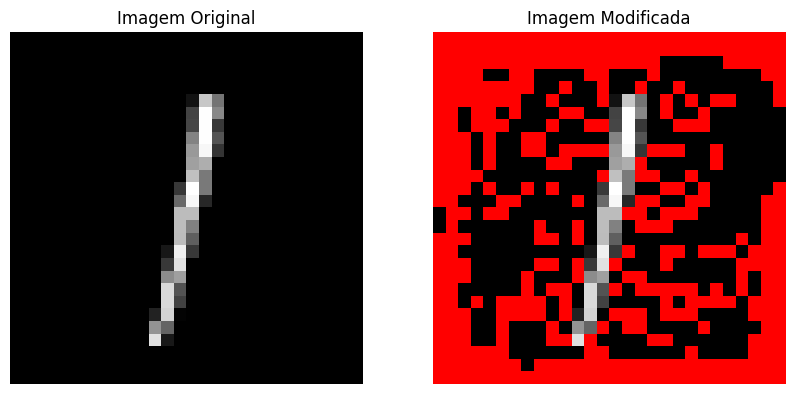

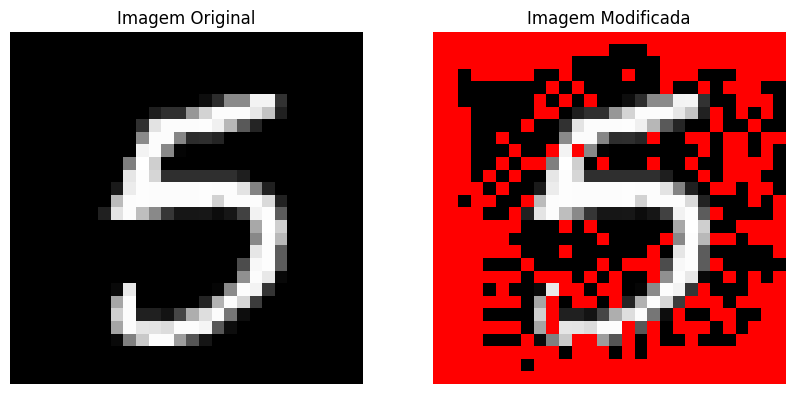

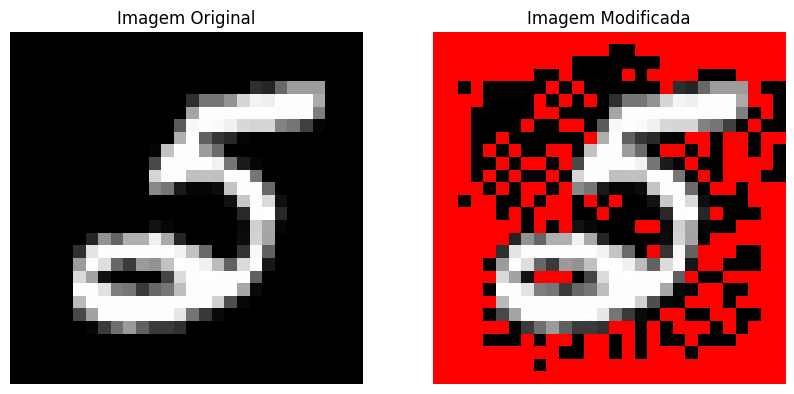

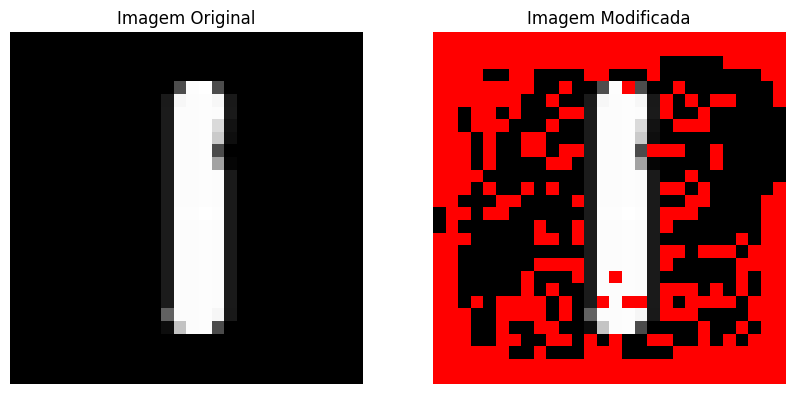

In [22]:
for i in range(4):
    if(predictions[i] == 1):
        formula = And(logistic_reg1_term > logistic_reg2_term, logistic_reg1_term > logistic_reg3_term)

    elif(predictions[i] == 5):
        formula = And(logistic_reg2_term > logistic_reg1_term, logistic_reg2_term > logistic_reg3_term)

    else:
        formula = And(logistic_reg3_term > logistic_reg1_term, logistic_reg3_term > logistic_reg2_term)

    img, red_pixel = minimalExplanation(X_test.iloc[i], domain_constraints, formula)
    
    img_rgb = pintar_pixels(X_test.iloc[i], red_pixel)
    # plot_mnist_image(np.array(X_test.iloc[i]))
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    axs[0].imshow(np.array(X_test.iloc[i]).reshape(28, 28), cmap='gray')
    axs[0].set_title('Imagem Original')
    axs[0].axis('off')


    axs[1].imshow(img_rgb)
    axs[1].set_title('Imagem Modificada')
    axs[1].axis('off')

    plt.show()
    